In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Prepare data

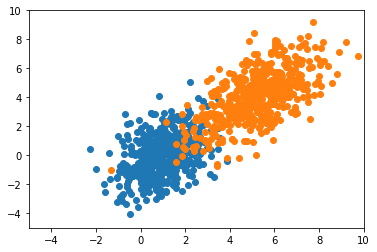

In [14]:
plt.xlim(-5,10)
plt.ylim(-5,10)

mean1=np.array([1,0])
cov1=np.array([
    [1,0.5],
    [0.5,2]
])
mean2=np.array([5,4])
cov2=np.array([
    [2,1.5],
    [1.5,3]
])

dist1=np.random.multivariate_normal(mean1,cov1,500)
dist2=np.random.multivariate_normal(mean2,cov2,500)


plt.scatter(dist1[:,0],dist1[:,1])
plt.scatter(dist2[:,0],dist2[:,1])

plt.show()


In [15]:
data=np.zeros((1000,3))
data[:500,:2]=dist1
data[500:,:2]=dist2
data[500:,-1]=1
np.random.shuffle(data)

In [16]:
# Train 75% and test 25% split

x_train=data[:750,:2]
y_train=data[:750,-1]

x_test=data[750:,:2]
y_test=data[750:,-1]


# KNN algorithm

In [17]:
def dist (a,b):
    return np.sum((a-b)**2)**0.5


In [18]:
def knn(x_train,y_train,test_point,k=7):
    distances=[]
    m=x_train.shape[0]
    for i in range(m):
        p=dist(x_train[i],test_point)
        distances.append([p,y_train[i]])
        
    distances=sorted(distances)   
    np_dist=np.array(distances)
    k_points=np_dist[:k,1]
    if(np.sum(k_points)>k//2):
        return 1
    return 0
        

In [19]:
knn(x_train,y_train,x_test[1])

0

# Accuracy

In [20]:
# Using all test points
def accuracy(x_train,y_train,x_test,y_test,k=7):
    m=x_test.shape[0]
    predictions=[]
    for i in range(m):
        p=knn(x_train,y_train,x_test[i],k=7)
        predictions.append(p)
    pred=np.array(predictions)
    return 100* np.sum(pred==y_test)/m

In [21]:
accuracy(x_train,y_train,x_test,y_test)

94.4

# Setting hyperparameter k 

In [22]:
for k in range(1,11):
     acu=accuracy(x_train,y_train,x_test,y_test,k)
     print(f"k={k} accuracy={acu}")
    

k=1 accuracy=94.4
k=2 accuracy=94.4
k=3 accuracy=94.4
k=4 accuracy=94.4
k=5 accuracy=94.4
k=6 accuracy=94.4
k=7 accuracy=94.4
k=8 accuracy=94.4
k=9 accuracy=94.4
k=10 accuracy=94.4


# Knn using scikit learn

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=25)

In [55]:
#training  i.e finding model parameters but since knn is instance based aglorithm it stores every data points for
# predictions

knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=25)

In [57]:
# Accuracy
knn.score(x_test,y_test)*100

95.19999999999999

In [64]:
# Predicting the class for new data point

# knn.predict(x_test[1].reshape(1,-1))
knn.predict([x_test[1]])

array([0.])